# Module 1: Python (Data Processing, EDA, Feature Engineering)
For the first module, the following has been done:
#### 1. Data Preprocessing:
- Load the dataset and inspect the data
- Handle missing values
- Convert categorical variables into numerical format using encoding techniques (e.g, One-Hot Encoding)
- Normalize / Standardize the data if necessary

#### 2. Exploratory Data Analysis (EDA):
- Generate Descriptive Statistics
- Visualize the data distribution for various features (e.g, histograms, box plots).
- Analyze the relationships between features and the target variable (Churn)
- Use correlation matrices to identify highly correlated features

#### 3. Feature Engineering:
- Create new features that might help improve the model's performance (e.g, interaction terms, polynomial features)
- Select important features using techniques like feature importance from tree-based models

**Importing necessary libraries**

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

**Loading the dataset and inspecting the first few rows**

In [2]:
# Read datasets
file_path = '../data/Telco-Customer-Churn.csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Handle missing values**

In [3]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

df = df.dropna()

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Exploratory Data Analysis (EDA)

**Churn Analysis**

Text(0.5, 1.0, 'Churn Distribution')

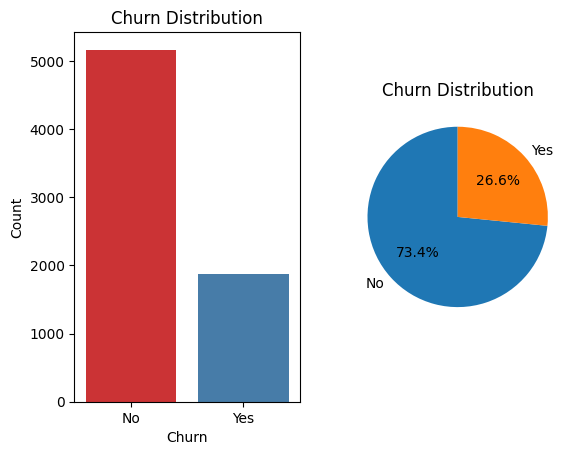

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.countplot(x='Churn', hue='Churn', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Churn Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Pie Chart for Churn
churn = df['Churn'].value_counts()
axes[1].pie(churn, labels=churn.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Churn Distribution')


**Churn by Gender and Churn by Senior Citizen Status**

It can be concluded by the plots that there is no apparent relationship between churn rates in males and females as they have almost the same churn rate. 

Now considering the senior citizen status, although the bars show a higher churn count amongst non-senior citizens, the total number of non-senior citizens is much higher than non-senior citizens, and there is not a significant difference in churn counts between both the groups, hence, we can conclude that the churn rate is higher amongst non-senior citizens.

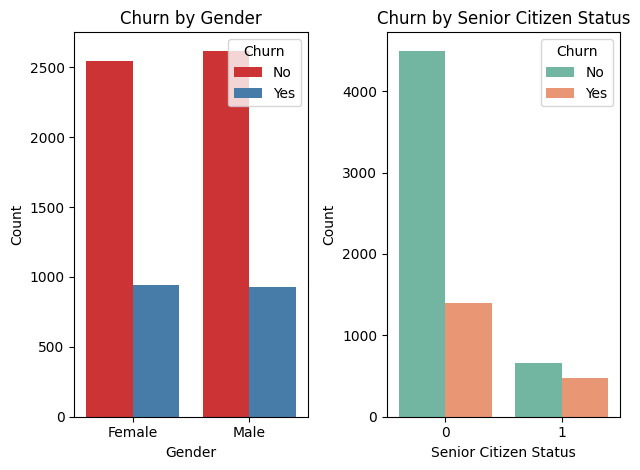

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2)

# Gender and Churn
sns.countplot(x='gender', hue='Churn', data=df, palette='Set1', ax=axes[0])
axes[0].set_title('Churn by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Senior Citizen and Churn
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Churn by Senior Citizen Status')
axes[1].set_xlabel('Senior Citizen Status')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**Plot to show the relationship between Churn and Contract types**

The resulting plot shows that month-to-month contracts have a higher churn rate as compared to one or two-year contracts which suggests that customers with month-to-month contracts are more likely to churn (possibly due to the flexibility of the contracts).
Two-year contracts show the least amount of churn rate, suggesting that these customers are the most loyal customers.

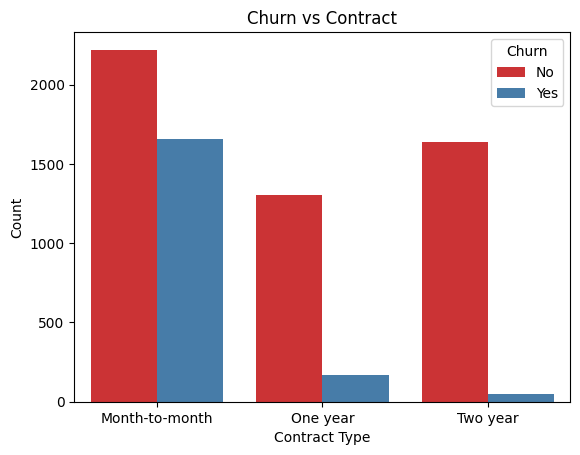

In [6]:
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set1')
plt.title('Churn vs Contract'); plt.xlabel('Contract Type'); plt.ylabel('Count')
plt.show()

**Churn Rate, Monthly Charges, and Total Charges**

- The first boxplot shows that the median monthly rate for the customers who have churned is a bit higher than those who have not. The upper and lower quartiles are also higher for the churned customers, which results in a lower IQR, but at a generally higher rate. This means that there was less variability in the monthly charges amongst customers who churned, but at a higher rate than those who did not. 
- The second box plot, however, seems counterintuitive as even customers with lower total charges have churned. The median value of the total charges is lower for those who churned as compared to those who did not. These customers could be customers who are not using many services, or are relatively newer maybe, and have not estbalished loyalty with the teleco, hence might be more prone to churn. The width of the box for those who did not churn is still significantly larger, so there is a lot of variability in the total charges for those who did not churn.
- Considering the third plot which shows monthly charges against total charges in relation to churn, there's a positive correlation overall between monthly and total charges, yet still those with higher monthly and total charges did not churn, which could suggest these are either customers availing more services or have been with the teleco much longer, showing loyalty. In contrast, we see that relatively more people churned who had higher monthly charges but not as much total charges. These could be customers who signed up for more expensive plans or more services but didn't stay long enough with the teleco to accumalate higher total charges. The high monthly charges could have led them to churn.

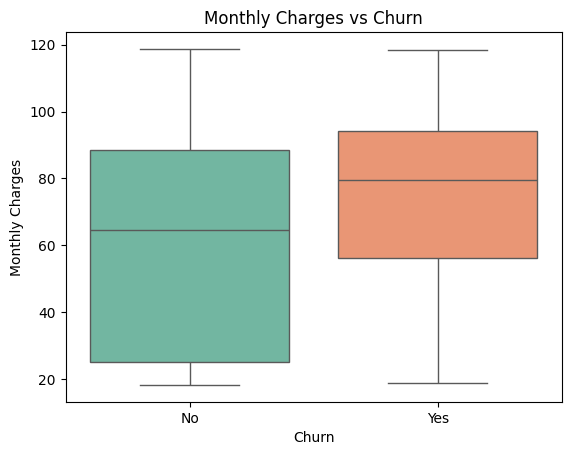

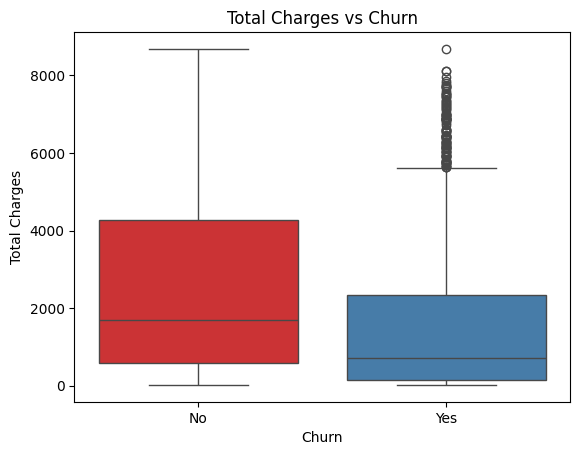

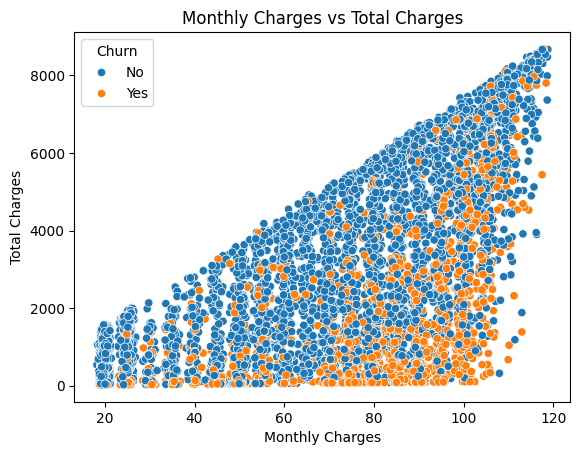

In [7]:
# Churn and Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2', dodge=False)
plt.title('Monthly Charges vs Churn'); plt.xlabel('Churn'); plt.ylabel('Monthly Charges')
plt.show()

# Churn and Total Charges
sns.boxplot(x='Churn', y='TotalCharges', data=df, hue='Churn', palette='Set1', dodge=False)
plt.title('Total Charges vs Churn'); plt.xlabel('Churn'); plt.ylabel('Total Charges')
plt.show()

# Monthly Charges vs Total Charges in relation to Churn
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Total Charges'); plt.xlabel('Monthly Charges'); plt.ylabel('Total Charges')
plt.show()

**Tenure, Monthly Charges, Total Charges, and Churn**

- The first box plot shows that the tenure for customers who churned is generally lower than those who did not churn. This suggests that newer customers are more likely to churn than those who have been with the teleco for a longer period of time.
- The second scatter plot shows that customers with lower tenure tend to churn more. We see a higher concentration of churned customers in the lower tenure but higher monthly charges region. Keeping this in mind, and observing the third scatter plot, we see that customers that have higher tenure, but more total charges have churned less comparatively. All this is in line with our previous assumptions that newer customers with higher monthly charges are more likely to churn, thus having lesser total charges. 

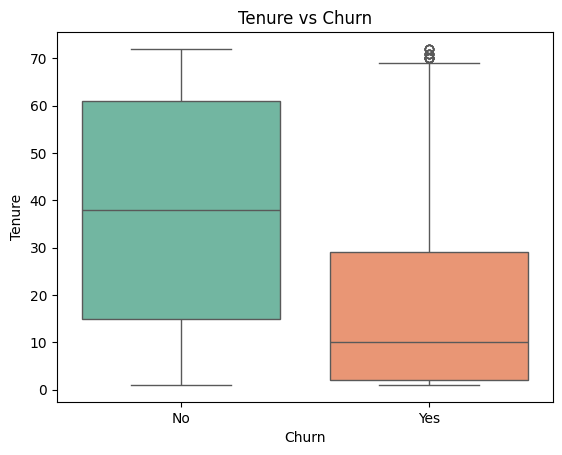

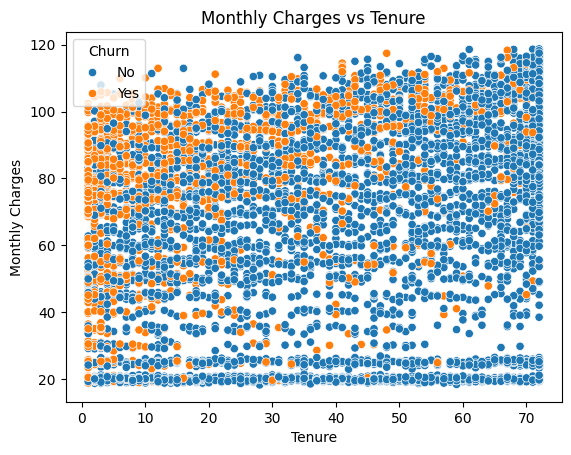

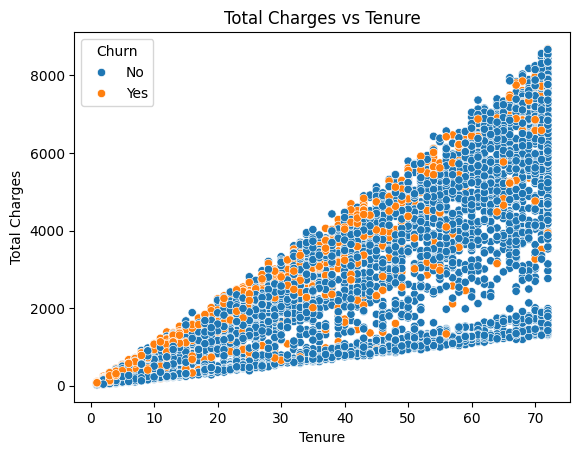

In [8]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, hue='Churn', palette='Set2', dodge=False)
plt.title('Tenure vs Churn'); plt.xlabel('Churn'); plt.ylabel('Tenure')
plt.show()

sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Tenure'); plt.xlabel('Tenure'); plt.ylabel('Monthly Charges')
plt.show()

sns.scatterplot(x='tenure', y='TotalCharges', hue='Churn', data=df)
plt.title('Total Charges vs Tenure'); plt.xlabel('Tenure'); plt.ylabel('Total Charges')
plt.show()

**Multivariate Analysis for Churn Rates among Customers based on their Partnership Status and Payment Methods**

The plot shows that customers with partners generally have a lower churn rate as compared to those without partners. 

- Customers who pay via electronic check have the highest churn rate across both categories suggesting that customers might be dissatisfied with the electronic check payment method. Where customers did not have partners, a larger fraction of customers churned.
- Customers who have an automatic payment method (bank and credit cards) tend to have a lower churn rate though across both categories, and more of these customers stayed loyal. The convenience of automatic payments might be a contributing factor to this.


Text(0.5, 1.0, 'Multivariate Analysis')

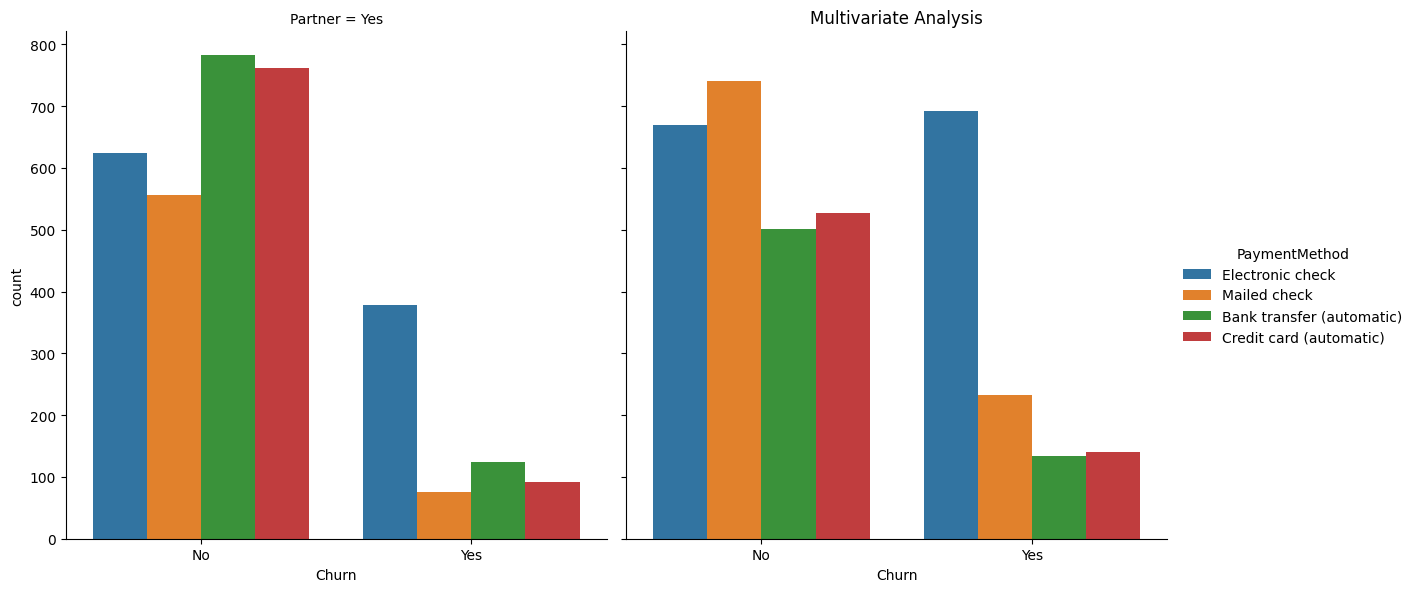

In [9]:
sns.catplot(x="Churn", hue="PaymentMethod", col="Partner",
                data=df, kind="count",
                height=6, aspect=1)
plt.title('Multivariate Analysis')

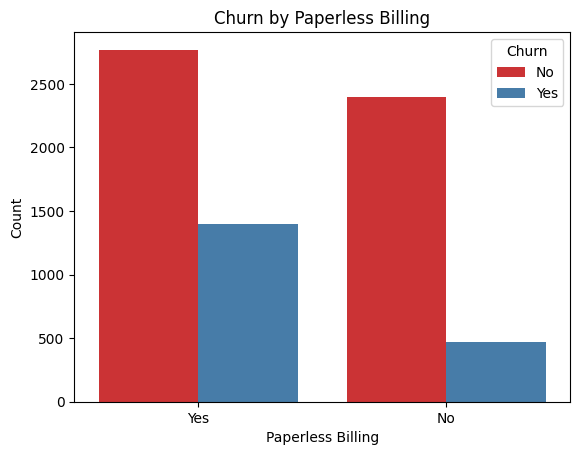

In [10]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='Set1')
plt.title('Churn by Paperless Billing')
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.show()

#### Data Processing, Conversion and Feature Engineering

The following code involves data preprocessing steps to convert categorical variables into numerical ones, and to prepare it for the machine learning model. 

- Categories are also simplified as 'No' and 'No Phone Service' essentially mean the same thing. And finally those 'Yes/No' values are converted to binary values. 
- One-hot encoding is also performed on 'InternetService', 'Contract', 'PaymentMethod' and 'gender' columns to improve the model's performance.
- Boolean columns are also converted to binary values for the mdoel.

In [11]:
yes_no_map = {'Yes': 1, 'No': 0}
df2 = df.replace({'No phone service': 'No', 'No internet service': 'No'})
df2 = df2.replace(yes_no_map)
df_encoded = pd.get_dummies(df2, columns=['InternetService','Contract',"PaymentMethod","gender"])
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)
df_encoded

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,1
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,1
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,1,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,0,1,1,24,1,1,1,0,1,...,0,0,1,0,0,0,0,1,0,1
7028,2234-XADUH,0,1,1,72,1,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
7029,4801-JZAZL,0,1,1,11,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
7030,8361-LTMKD,1,1,0,4,1,1,0,0,0,...,1,1,0,0,0,0,0,1,0,1


In [12]:
df_encoded.to_csv('../data/processed_data.csv', index=False)

**Correlation Matrix**

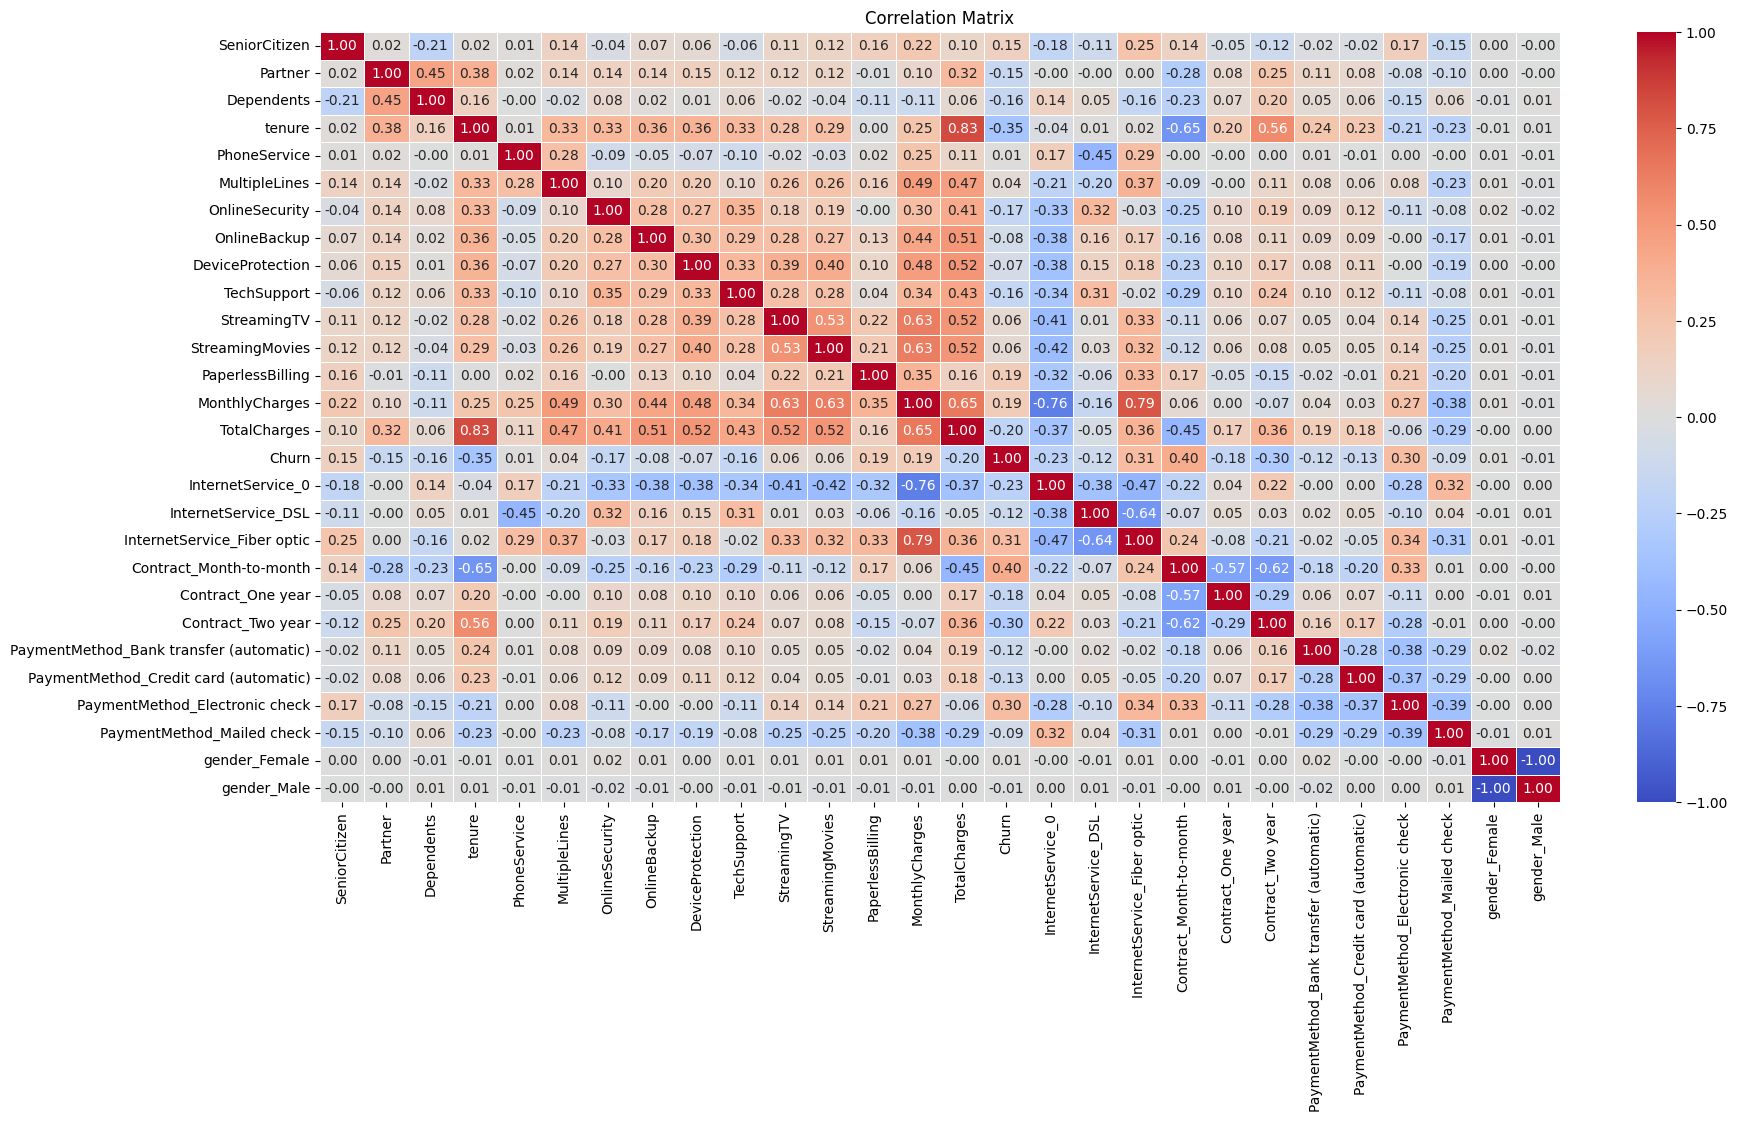

In [13]:
df_3 = df_encoded.drop(['customerID'], axis=1)
df_3
corr_matrix = df_3.corr()

# Plotting correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [14]:
X = df_encoded.drop(['Churn', 'customerID'], axis=1)
y = df_encoded['Churn']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

df_smote = pd.concat([X_sm, y_sm], axis=1)
df_smote

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Churn
0,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,34,1,0,1,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,1
3,0,0,0,45,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,2,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,0,0,0,2,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
10322,0,1,0,17,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
10323,0,0,0,4,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
10324,0,0,0,42,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


Text(0.5, 1.0, 'Churn Distribution')

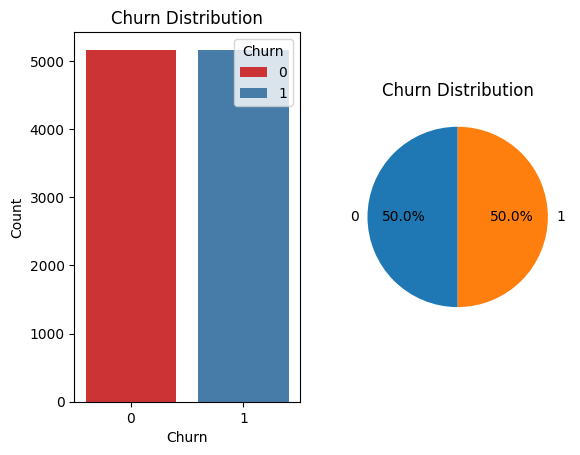

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.countplot(x='Churn', hue='Churn', data=df_smote, palette='Set1', ax=axes[0])
axes[0].set_title('Churn Distribution')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Count')

# Pie Chart for Churn
churn = df_smote['Churn'].value_counts()
axes[1].pie(churn, labels=churn.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Churn Distribution')

In [16]:
# Exporting the final data set to be taken by the machine learning model for training and testing
df_encoded = df_smote
df_encoded.to_csv('../data/processed_data_ml_model.csv', index=False)